### Lesson 1 - Numerical analysis - Numerical differentiation

The following material is partly covered in Section 15 - *Floating Point Arithmetic: Issues and Limitations* of the [Python documentation](https://docs.python.org/3/tutorial/floatingpoint.html) and Chapter 5 - *Numerical Differentiation* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).

In [6]:
# The `hex()` method expresses a float in hexadecimal (base 16), again giving the exact value stored by your computer.
x = 0.1
print(x.hex())

0x1.999999999999ap-4


hex to decimal

https://www.rapidtables.com/convert/number/hex-to-decimal.html?x=0x1.400p%2B0

In [38]:
Vmax = float.fromhex('0x1.400p+0')
print(Vmax)
print((1 + 4/16) * 2 ** 0)
KM = float.fromhex('0x1.d00p-1')
print(KM)
KM = (1 + 13/16) * 2 ** -1
print(KM)


1.25
1.25
0.90625
0.90625


In [8]:
x = 0.1+0.2 +0.3
y = 0.6
print("0.1 + 0.2 + 0.3 = {} , 0.6 = {}".format(x.hex(),y.hex()))
print(x == y)
x = 1.0 + 2.0 + 3.0
y = 6.0
print("1.0 + 2.0 + 3.0 = {} , 6.0 = {}".format(x.hex(),y.hex()))
print(x == y)

0.1 + 0.2 + 0.3 = 0x1.3333333333334p-1 , 0.6 = 0x1.3333333333333p-1
False
1.0 + 2.0 + 3.0 = 0x1.8000000000000p+2 , 6.0 = 0x1.8000000000000p+2
True


When converted from hexadecimal to binary, we would obtain `'0b1.1001100110011001100110011001100110011001100110011010p-4'`, which corresponds exactly with the (rounded) binary expansion given earlier. The `p` indicates binary scientific notation (similar to te `e` in base 10, like in `0.1 == 1e-1`).

We can access the internal binary representation directly using the following bit of code magic.

In [9]:
import struct
bits = ''.join(bin(byte).replace('0b', '').rjust(8, '0') for byte in struct.pack('!d', x))
print(bits)

0100000000011000000000000000000000000000000000000000000000000000


A double-precision floating point value is encoded in 8 bytes. The 64 bits of this bit-representation can be dissected into three parts:

* 1 sign bit: `0` (for positive numbers, or `1` for negative numbers)

* 11 exponent bits: `01111111011` (for a biased exponent of 1019)

* 52 mantissa bits: `1001100110011001100110011001100110011001100110011010`

This generally translates into a value

$$
(-1)^\text{sign} \cdot (1.\text{mantissa})_\text{b} \times 2^{\text{exponent}-1023}
$$

Note that in binary, the first digit in scientific notation must always be a 1, so we do not need to encode that explicitly and simply prepend it before the decimal point before the mantissa. In the given case of 0.1, this becomes $(-1)^0 \cdot (1.1001100110011001100110011001100110011001100110011010)_b \times 2^{-4}$ which approximately equals 0.1.

In [10]:
for i in [1,
          1.5000000000000000,
          2.0000000000000000,
          -2.000000000000000,
          -1.333333333333333,
          3.1415926535897932,
          1.0000000000000002,
          1.0000000000000001,
          0.0,
          -0.0,
          float('inf'),
          float('-inf'),
          float('nan')]:
    bits = ''.join(bin(byte).replace('0b', '').rjust(8, '0') for byte in struct.pack('!d', i))
    print(str(i) + " : " + bits)

1 : 0011111111110000000000000000000000000000000000000000000000000000
1.5 : 0011111111111000000000000000000000000000000000000000000000000000
2.0 : 0100000000000000000000000000000000000000000000000000000000000000
-2.0 : 1100000000000000000000000000000000000000000000000000000000000000
-1.333333333333333 : 1011111111110101010101010101010101010101010101010101010101010100
3.141592653589793 : 0100000000001001001000011111101101010100010001000010110100011000
1.0000000000000002 : 0011111111110000000000000000000000000000000000000000000000000001
1.0 : 0011111111110000000000000000000000000000000000000000000000000000
0.0 : 0000000000000000000000000000000000000000000000000000000000000000
-0.0 : 1000000000000000000000000000000000000000000000000000000000000000
inf : 0111111111110000000000000000000000000000000000000000000000000000
-inf : 1111111111110000000000000000000000000000000000000000000000000000
nan : 0111111111111000000000000000000000000000000000000000000000000000


In [11]:
# translate binary to decimal
string = "0011111111110000000000000000000000000000000000000000000000000001"
sign = int(string[0])
exp = 0
for i in range(11):
    exp += 2**(10-i)*int(string[1:12][i])
exp -= 1023
mantissa = 0
for j in range(1,53):
    mantissa += (2**(-j))*(int(string[11:][j]))
print((-1)**sign*(1+mantissa)*(2**exp))

1.0000000000000002


In [12]:
def get_decimal(string="0011111111110000000000000000000000000000000000000000000000000001"):
    sign = int(string[0])
    exp = 0
    for i in range(11):
        exp += 2**(10-i)*int(string[1:12][i])
    exp -= 1023
    mantissa = 0
    for j in range(1,53):
        mantissa += (2**(-j))*(int(string[11:][j]))
    print((-1)**sign*(1+mantissa)*(2**exp))
    data = (-1)**sign*(1+mantissa)*(2**exp)
    return data
get_decimal("0100000000001000000000000000000000000000000000000000000000000000")

3.0


3.0

The IEEE-754 standard also includes a [single-precision](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) floating point number of 4 bytes, including 1 sign bit, 8 exponent bits with exponent bias -127, and 23 mantissa bits. Determine the bit-representation of the single-precision number `3.0`. How many correct decimals does this representation approximately have? Hint: first have a look at the double-precision representation, and adapt this form.

In [13]:
for i in [3]:
    # IEEE 754 binary32, binary64 or binary16 format 'f', 'd' and 'e'
    bits = ''.join(bin(byte).replace('0b', '').rjust(8, '0') for byte in struct.pack('!f', i))
    print("32 bits",i,bits)
    # 1 sign bit, 8 exponent bits, and 23 mantissa bits.
    bit = ''.join(bin(byte).replace('0b', '').rjust(8, '0') for byte in struct.pack('!d', i))
    print("64 bits",i,bit)
    # 1 sign bit,11 exponent bits, and 52 mantissa bits.


32 bits 3 01000000010000000000000000000000
64 bits 3 0100000000001000000000000000000000000000000000000000000000000000


Now that we have some idea how numbers are represented in a computer, we continue with the main topic of this lesson: numerical differentiation.

### Difference Approximations

Any function $f$ that is sufficiently well-behaved (i.e. smooth, continuous, differentiable functions) can be approximated locally by means of a polynomial expansion. That is to say, if at some value $x$ the function has a value $y = f(x)$, then for small values of a variable $h$ the function value $f(x+h)$ can be estimated by a polynomial. When using a 0-th order polynomial (i.e. a constant function), then we arrive at $f(x+h) \approx y$. Therefore, the value of the function at $x+h$ is close to the value of the function at $x$. However, we can do better. When using a 1-st order polynomial (i.e. a linear function) we arrive at $f(x+h) = a + b h$. It turns out that the slope $b$ precisely equals the derivative of the function at $x$. Thus, we obtain

$$
f(x+h) = f(x) + f'(x) \cdot h
$$

We can use the above 1-st order [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) to derive an expression for the derivative $f'(x)$.

$$
f'(x) = \frac{f(x+h) - f(x)}{h}
$$

This is called the *forward difference approximation*.

Alternatively, we could have used a negative value for $h$, leading to $f(x-h) = f(x) - f'(x) \cdot h$ and the *backward difference approximation*

$$
f'(x) = \frac{f(x) - f(x-h)}{h}
$$

Both approximations can also be combined to obtain

$$
f'(x) = \frac{f(x+h) - f(x-h)}{2h}
$$

This is called the *central difference approximation*.

In [14]:
def forward_derivative(f, x, h=...):
    """df = forward_derivative(f, x, h).
    Calculates the forward difference approximation of the
    function f(x).
    """
    df = (f(x+h) - f(x)) / h
    return df

def backward_derivative(f, x, h=...):
    """df = forward_derivative(f, x, h).
    Calculates the backward difference approximation of the
    function f(x).
    """
    df = (f(x) - f(x-h)) / h
    return df

def central_derivative(f, x, h=...):
    """df = central_derivative(f, x, h).
    Calculates the central difference approximation of the
    function f(x).
    """
    df = (f(x+h) - f(x-h)) / (2 * h)
    return df
    
# Example: derivative of ln(x) at x = 2
from math import log

hs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
df_exact = 0.5

for h in hs:
    df_forward = forward_derivative(log, 2.0, h)
    df_backward = backward_derivative(log, 2.0, h)
    df_central = central_derivative(log, 2.0, h)
    print(f'h = {h:7.1e}:')
    print(f'\t* forward : {df_forward:12.6e} (error={df_forward-df_exact:7.1e})')
    print(f'\t* backward: {df_backward:12.6e} (error={df_backward-df_exact:7.1e})')
    print(f'\t* central : {df_central:12.6e} (error={df_central-df_exact:7.1e})')

h = 1.0e-01:
	* forward : 4.879016e-01 (error=-1.2e-02)
	* backward: 5.129329e-01 (error=1.3e-02)
	* central : 5.004173e-01 (error=4.2e-04)
h = 1.0e-02:
	* forward : 4.987542e-01 (error=-1.2e-03)
	* backward: 5.012542e-01 (error=1.3e-03)
	* central : 5.000042e-01 (error=4.2e-06)
h = 1.0e-03:
	* forward : 4.998750e-01 (error=-1.2e-04)
	* backward: 5.001250e-01 (error=1.3e-04)
	* central : 5.000000e-01 (error=4.2e-08)
h = 1.0e-04:
	* forward : 4.999875e-01 (error=-1.2e-05)
	* backward: 5.000125e-01 (error=1.3e-05)
	* central : 5.000000e-01 (error=4.2e-10)
h = 1.0e-05:
	* forward : 4.999988e-01 (error=-1.2e-06)
	* backward: 5.000013e-01 (error=1.3e-06)
	* central : 5.000000e-01 (error=8.8e-12)
h = 1.0e-06:
	* forward : 4.999999e-01 (error=-1.2e-07)
	* backward: 5.000001e-01 (error=1.2e-07)
	* central : 5.000000e-01 (error=1.4e-11)
h = 1.0e-07:
	* forward : 5.000000e-01 (error=-1.3e-08)
	* backward: 5.000000e-01 (error=1.3e-08)
	* central : 5.000000e-01 (error=-2.6e-10)
h = 1.0e-08:
	* for

$$
\begin{aligned}
f'(x) &= \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)
\\
f'(x) &= \frac{f(x) - f(x-h)}{h} + \mathcal{O}(h)
\\
f'(x) &= \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2)
\end{aligned}
$$

For sufficiently small $h$, the `central_derivative` method will therefore tend to be preferable. However, keep in mind that when $h$ becomes too small, numerical round-off errors start to dominate.

### Higher-order derivatives

We can include higher-order terms in the polynomial approximation of the Taylor series expansion. The general form is

$$
f(x+h) = \sum_{n=0}^N \frac{1}{n!} f^{(n)}(x) \cdot h^n + \mathcal{O}(h^{N+1})
$$
$$
f(x-h) = \sum_{n=0}^N \frac{1}{n!} f^{(n)}(x) \cdot (-h)^n + \mathcal{O}(h^{N+1})
$$


We will limit ourselves to the case $N=2$, for which we get the quadratic form

$$
f(x+h) = f(x) + f'(x) \cdot h + \frac{1}{2} f''(x) \cdot h^2 + \mathcal{O}(h^3)
$$

If we apply this to arguments $x-h$, $x$, and $x+h$, and disregard the error term, we obtain a system of three equations

$$
\begin{aligned}
f(x-h) &= f(x) - f'(x) \cdot h + \frac{1}{2!} f''(x) \cdot h^2 - \frac{1}{3!} f'''(x) \cdot h^3
\\
f(x) &= f(x)
\\
f(x+h) &= f(x) + f'(x) \cdot h + \frac{1}{2} f''(x) \cdot h^2 + \frac{1}{3!} f'''(x) \cdot h^3
\end{aligned}
$$

that can be solved using linear algebra techniques to find the solution

$$
\begin{aligned}
f(x) &= f(x)
\\
f'(x) &= \frac{f(x+h) - f(x-h)}{2h}
\\
f''(x) &= \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{aligned}
$$

We recognise the central difference approximation for $f'(x)$.

In [15]:
def central_derivative2(f, x, h=...):
    """df = central_derivative2(f, x, h).
    Calculates the second-order derivative of the
    function f(x).
    """
    ddf = (f(x+h)-2*f(x) + f(x-h)) / h**2
    return ddf

# Exercise
Compute the first- and second-order derivatives of the exponential function $g(x) = 2^x$ at $x = 0$ using the following three methods:

* analytically, using symbolic differentiation;

* using your own functions `central_derivative()` and `central_derivative2()`;

* using the function `derivative` of the module `scipy.misc` (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)).

In [16]:
from scipy.misc import derivative
from math import log
def f(x):
    # first-order derivative
    return log(2) * 2**x

def g(x):
    # second-order derivative
    return (log(2))**2 * 2**x
print("symbolic differentiation = {} ,differentiation2 = {} ". format(f(0),g(0)))
def f(x):
    return 2**x
print("My central_derivative = {} ,central_derivative2 = {}".format(central_derivative(f,0,1e-6), central_derivative2(f,0,1e-6)))
print("Scipy central_derivative = {} ,central_derivative2 = {}".format(derivative(f, 0.0, dx=1e-6), derivative(f, 0.0, dx=1e-6,n=2)))

symbolic differentiation = 0.6931471805599453 ,differentiation2 = 0.4804530139182014 
My central_derivative = 0.6931471805415867 ,central_derivative2 = 0.48050452505776775
Scipy central_derivative = 0.6931471805415867 ,central_derivative2 = 0.48050452505776775


In [17]:
# first order
from math import log
from scipy.misc import derivative
def f(x):
    from math import log
    return log(2)*2**x
def g(f,x,h):
    return (f(x+h) - f(x-h)) / (2*h)
x = 0
print(f(x))
print(g(lambda x:2**x,x,1e-6))
print(derivative(lambda x:2**x,x,1e-6))
# second order
def f2(x):
    from math import log
    return log(2)**2*2**x
def g2(f,x,h):
    return (f(x+h) - 2*f(x)+ f(x-h))/h**2
print(f2(x))
print(g2(lambda x:2**x,x,1e-6))
# dx = h; n = order
print(derivative(lambda x:2**x,x,n=2,dx=1e-6))

0.6931471805599453
0.6931471805415867
0.6931471805415867
0.4804530139182014
0.48050452505776775
0.48050452505776775


Compute the derivative of the cosine- and sine-functions at $x = \pi$ using the forward, backward, and central difference approximations. Also, investigate the order of the errors; explain any deviations that you observe in behaviour of the error compared to those in previous examples.

In [18]:
from math import log,pi,sin,cos
hs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
df_exact = 0.5
print("SIN")
for h in hs:
    df_forward = forward_derivative(sin, pi, h)
    df_backward = backward_derivative(sin, pi, h)
    df_central = central_derivative(sin, pi, h)
    print(f'h = {h:7.1e}:')
    print(f'\t* forward : {df_forward:12.6e} (error={df_forward-df_exact:7.1e})')
    print(f'\t* backward: {df_backward:12.6e} (error={df_backward-df_exact:7.1e})')
    print(f'\t* central : {df_central:12.6e} (error={df_central-df_exact:7.1e})')
print("COS")
for h in hs:
    df_forward = forward_derivative(cos, pi, h)
    df_backward = backward_derivative(cos, pi, h)
    df_central = central_derivative(cos, pi, h)
    print(f'h = {h:7.1e}:')
    print(f'\t* forward : {df_forward:12.6e} (error={df_forward-df_exact:7.1e})')
    print(f'\t* backward: {df_backward:12.6e} (error={df_backward-df_exact:7.1e})')
    print(f'\t* central : {df_central:12.6e} (error={df_central-df_exact:7.1e})')

SIN
h = 1.0e-01:
	* forward : -9.983342e-01 (error=-1.5e+00)
	* backward: -9.983342e-01 (error=-1.5e+00)
	* central : -9.983342e-01 (error=-1.5e+00)
h = 1.0e-02:
	* forward : -9.999833e-01 (error=-1.5e+00)
	* backward: -9.999833e-01 (error=-1.5e+00)
	* central : -9.999833e-01 (error=-1.5e+00)
h = 1.0e-03:
	* forward : -9.999998e-01 (error=-1.5e+00)
	* backward: -9.999998e-01 (error=-1.5e+00)
	* central : -9.999998e-01 (error=-1.5e+00)
h = 1.0e-04:
	* forward : -1.000000e+00 (error=-1.5e+00)
	* backward: -1.000000e+00 (error=-1.5e+00)
	* central : -1.000000e+00 (error=-1.5e+00)
h = 1.0e-05:
	* forward : -1.000000e+00 (error=-1.5e+00)
	* backward: -1.000000e+00 (error=-1.5e+00)
	* central : -1.000000e+00 (error=-1.5e+00)
h = 1.0e-06:
	* forward : -1.000000e+00 (error=-1.5e+00)
	* backward: -1.000000e+00 (error=-1.5e+00)
	* central : -1.000000e+00 (error=-1.5e+00)
h = 1.0e-07:
	* forward : -1.000000e+00 (error=-1.5e+00)
	* backward: -1.000000e+00 (error=-1.5e+00)
	* central : -1.000000e+0

The exponential function $f(x) = e^x = \text{exp}(x)$ can be written as a sum

$$
e^x = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 + \ldots
$$

At the same time, the rational function $g(x) = \frac{1}{1-x}$ can be written as a sum

$$
\frac{1}{1-x} = b_0 + b_1 x + b_2 x^2 + b_3 x^3 + b_4 x^4 + \ldots
$$

Find the values of the coefficients $a_0, a_1, \ldots, a_4$ and $b_0, b_1, \ldots, b_4$ by calculating the $n$-th derivatives $f^{(n)}(x)$ and $g^{(n)}(x)$ and inserting these in the Taylor series expansion. Can you discern a pattern in the values of these coefficients?

Next, plot the function $f(x)$ along with the Taylor approximations $a_0 + \ldots + a_k x^k$ for several increasing values of $k$. Do the same for $g(x)$ in a separate plot. Do the approximations converge towards the original functions everywhere?

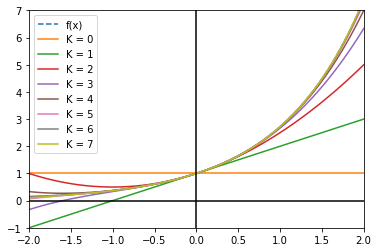

In [19]:
# f(x) = e**x = exp(x)
import matplotlib.pyplot as plt
from math import factorial
import numpy as np
from scipy.misc import derivative

f = lambda x: np.exp(x)
fac = lambda x:factorial(x)
a = []
# coef = a
x = np.linspace(-2,+2,101)
plt.plot(x,f(x),"--",label="f(x)")
k = 8
for i in range(k):
    a.append(derivative(f,0,n=i,dx=1e-2,order = 2*i+1)/fac(i))
    t = lambda x: sum(a[j]*x**j for j in range(len(a)))
    plt.plot(x,t(x),label = "K = {}".format(i))
plt.axhline(0.0,color="black")
plt.axvline(0.0,color="black")
plt.ylim(-1,7);plt.xlim(-2,2)
plt.legend()    
plt.show()


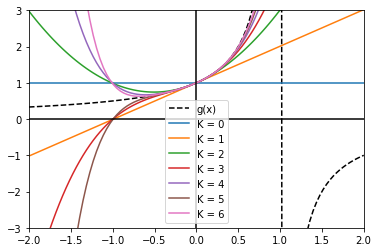

In [20]:
# f(x) = 1/(1-x)
f = lambda x: 1/(1-x)
fac = lambda x:factorial(x)
a = []
# coef = a
x = np.linspace(-2,2,100)
plt.plot(x,f(x),"--k",label="g(x)")
k = 7
for i in range(k):
    a.append(derivative(f,0,n=i,dx=1e-1,order = 2*i+1)/fac(i))
    t = lambda x: sum(a[j]*x**j for j in range(len(a)))
    plt.plot(x,t(x),label = "K = {}".format(i))
plt.axhline(0.0,color="black")
plt.axvline(0.0,color="black")
plt.ylim(-3,3);plt.xlim(-2,2)
plt.legend(loc="lower center") 
plt.show()

## Lesson2 - Numerical integration

The following material is covered in Chapter 6 - *Numerical Integration* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).

The composite Simpson’s 1/3 rule is perhaps the best known method of numerical integration. However, its reputation is somewhat undeserved, because the trapezoidal rule is more robust and Romberg integration is more efficient.
### Introduction

[Numerical integration](https://en.wikipedia.org/wiki/Numerical_integration), also known as *quadrature*, is intrinsically a much more accurate procedure than numerical differentiation. Quadrature approximates the definite integral

$$
\int_a^b f(x) \text{d}x = I \approx \sum_{i=0}^n A_i f(x_i)
$$

where the *abscissas* $x_i$ and *weights* $A_i$ depend on the particular rule used for the quadrature. All rules of quadrature are derived from polynomial interpolation of the integrand. Therefore, they work best if $f(x)$ can be approximated by a polynomial.

### Newton-Cotes Formulas

[Newton-Cotes formulas](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas) are characterized by equally spaced abscissas and include well-known methods such as the trapezoidal rule and Simpson’s rule. They are most useful if $f(x)$ has already been computed at equal intervals or can be computed at low cost. Because Newton-Cotes formulas are based on local interpolation, they require only a piecewise fit to a polynomial.

Consider the definite integral $I = \int_a^b f(x) \text{d}x$. We divide the range of integration $a < x < b$ into $n$ equal intervals of length $h = \frac{b-a}{n}$, and denote the abscissas of the resulting nodes by $x_0$, $x_1$ ,... , $x_n$. Next we approximate $f(x)$ by a polynomial of degree $n$ that intersects all the nodes.

This is known as the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). In practice the trapezoidal rule is applied in a piecewise fashion. The function $f(x)$ to be integrated is approximated by a piecewise linear function through all points $(x_i, f(x_i))$. From the trapezoidal rule we obtain for the approximate total area representing $\int_a^b f(x) \text{d}x$

$$
I = \sum_{i=0}^{n-1} I_i = \left( f(x_0) + 2 f(x_1) + 2 f(x_2) + \ldots + 2 f(x_{n-1}) + f(x_n) \right) \frac{h}{2}
$$

which is the *composite trapezoidal rule*.

It can be shown that the error in each term $I_i$ is of the order $\mathcal{O}(h^3)$. However, because the number of trapezoids equals $n = \frac{b-a}{h}$, the error of the composite trapezoidal rule cumulates to $\mathcal{O}(h^2)$.

In [21]:
def trapezoid(f, a, b, n=...):
    # 梯形公式
    """df = trapezoid(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite trapezoidal rule with
    n subdivisions (with default n=...).
    """
    h = (b-a)/n
    I = f(a)+f(b)
    for i in range(1,n):
        I += 2 * f(a + h*i)
    I *= (h/2)
    return I

### Recursive Trapezoidal Rule

Let $I_k$ be the integral evaluated with the composite trapezoidal rule using $2^k$ panels. Note that if $k$ is increased by one, the number of panels is doubled. Using the notation $h_k=\frac{b−a}{2^k}$ for the interval size, we obtain the following results.

* $k = 0$ (one panel):

$$
I_0 = \left( f(a) + f(b) \right) \frac{h_0}{2}
$$

* $k = 1$ (two panels):

$$
I_1 = \left( f(a) + 2 f(a+h_1) + f(b) \right) \frac{h_1}{2} = \frac{1}{2} I_0 + f(a+h_1) h_1
$$

* $k = 2$ (four panels):

$$
I_2 = \left( f(a) + 2 f(a+h_2) + 2 f(a+2h_2) + 2 f(a+3h_2) + f(b) \right) \frac{h_2}{2} = \frac{1}{2} I_1 + \left( f(a+h_2) + f(a+3h_2) \right) h_2
$$

We can now see that for arbitrary $k > 0$ we have

$$
I_k = \frac{1}{2} I_{k-1} + h_k \cdot \sum_{i=1, 3, 5, \ldots, 2^k-1} f(a+i \cdot h_k)
$$
The advantage of using the recursive trapezoidal rule is that it allows us to monitor convergence and terminate the process when the difference between Ik−1 and Ik becomes sufficiently small.

In [22]:
# recursive
def trapezoid(f, a, b, tol=...):
    # 梯形公式遞迴，因為h隨著k增加會變為本來的二分之一故變為 0.5*I
    """df = trapezoid(f, a, b, tol=...).
    Calculates the definite integral of the function f(x)
    from a to b using the recursive trapezoidal rule with
    an absolute tolerance tol (with default ...).
    """
    n = 0
    h0 = (b-a) / 2 ** n
    I0 = (f(a) + f(b))* h0 /2
    while True:
        n += 1
        hk = (b-a) / 2 ** n
        Ik   = 1/2*I0 + hk * sum([f(a+i*hk) for i in range(1,2**n,2)])
        if abs(Ik - I0) < tol:
            return Ik
        I0 = Ik

### Simpson's Rule

[Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) can be obtained from Newton-Cotes formulas with $n = 2$; that is, by passing a parabolic interpolant through three adjacent nodes, each separated by $h$. The area under the parabola, which represents an approximation of $I = \int_a^b f(x) \text{d}x$, can be shown to equal

$$
I = \left( f(a) + 4 f(\frac{a+b}{2}) + f(b) \right) \frac{h}{3}
$$

To obtain the *composite Simpson's rule*, the integration range $(a, b)$ is divided into $n$ panels (with $n$ even) of width $h = \frac{b − a}{n}$ each. Applying the above formula to two adjacent panels, we obtain

$$
I = \left( f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \ldots + 2f(x_{n−2}) + 4f(x_{n−1}) + f(x_n) \right) \frac{h}{3}
$$

The composite Simpson's rule is perhaps the best known method of numerical integration. However, its reputation is somewhat undeserved, because the trapezoidal rule is more robust and Romberg integration (below) is more efficient.

In [23]:
def simpson(f, a, b, n=...):
    """df = simpson(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite Simpson's
    rule with n subdivisions (with default n=...).
    """
    n += n % 2
    h = (b-a) / n
    I = f(a) + f(b)
    for i in range(1,n):
        if i % 2 == 0:
            I += 2 * f( a + h * i)
        elif i % 2 == 1:
            I += 4 * f( a + h * i)
    I *= (h/3)
    return I

### Romberg Integration

[Romberg integration](https://en.wikipedia.org/wiki/Romberg%27s_method) is based on the trapezoidal rule. It evaluates an integral using a series of different interval sizes. Subsequently, these various answers are averaged using carefully chosen weights that are tuned in such a way that the errors tend to cancel. Thus, a solution can be found that is much more accurate than any of the individual evaluations. 

We will not derive the method here, but merely describe it. For more details, see the book chapter.

Let us first introduce the notation $R_{k,0} = I_k$, where, as before, $I_k$ represents the approximate value of $I = \int_a^b f(x) \text{d}x$ computed by the recursive trapezoidal rule using $2^k$ panels. Romberg integration starts with the computation of $R_{0,0} = I_0$ (one panel) and $R_{1,0} = I_1$ (two panels) from the trapezoidal rule. We already know that these have an error of order $\mathcal{O}(h^2)$. These two estimates are combined linearly in order to obtain a better estimate according to $R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0}$ that turns out to have an error $\mathcal{O}(h^4)$.

It is convenient to store the results in a triangular array of the form

$$
\begin{array}{cc}
R_{0,0} = I_0 &\\
& R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0}\\
R_{1,0} = I_1 &
\end{array}
$$

The next step is to calculate $R_{2,0} = I_2$ (four panels) and repeat the combination procedure with $R_{1,0}$ and $R_{2,0}$, storing the result as $R_{2,1} = \frac{4}{3} R_{2,0} - \frac{1}{3} R_{1,0}$. The elements $R_{2,0}$ and $R_{2,1}$ are now both $\mathcal{O}(h^4)$ approximations, which can in turn be combined to obtain $R_{2,2} = \frac{16}{15} R_{2,1} - \frac{1}{15} R_{1,1}$ with error $\mathcal{O}(h^6)$. The array has now expanded to

$$
\begin{array}{ccc}
R_{0,0} = I_0 & &\\
& R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0} &\\
R_{1,0} = I_1 & & R_{2,2} = \frac{16}{15} R_{2,1} - \frac{1}{15} R_{1,1}\\
& R_{2,1} = \frac{4}{3} R_{2,0} - \frac{1}{3} R_{1,0} &\\
R_{2,0} = I_2 & &
\end{array}
$$

After another round of calculations we get

$$
\begin{array}{cccc}
R_{0,0} = I_0 & & &\\
& R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0} & &\\
R_{1,0} = I_1 & & R_{2,2} = \frac{16}{15} R_{2,1} - \frac{1}{15} R_{1,1} &\\
& R_{2,1} = \frac{4}{3} R_{2,0} - \frac{1}{3} R_{1,0} & & R_{3, 3} = \frac{64}{63} R_{3,2} - \frac{1}{63} R_{2,2}\\
R_{2,0} = I_2 & & R_{3,2} = \frac{16}{15} R_{3,1} - \frac{1}{15} R_{2,1} &\\
& R_{3,1} = \frac{4}{3} R_{3,0} - \frac{1}{3} R_{2,0} & &\\
R_{3,0} = I_3 & & &
\end{array}
$$

where the error in $R_{3,3}$ is $\mathcal{O}(h^8)$.

The general extrapolation formula used in this scheme is

$$
R_{i,j} = \frac{4^j R_{i,j−1} - R_{i−1,j−1}}{4^j - 1}
$$

In [24]:
def romberg(f, a, b, tol=...):
    """df = romberg(f, a, b, tol=...).
    Calculates the definite integral of the function f(x)
    from a to b using Romberg integration based on the
    trapezoidal rule until a specified tolerance tol is
    reached (with default tol=...).
    """
    n = 0
    h0 = (b-a) / 2 ** n
    I0 = (f(a) + f(b))* h0 /2
    collect = []
    collect.append([I0])
    while True:
        n += 1
        hk = (b-a) / 2 ** n
        Ik   = 1/2*I0 + hk * sum(f(a+i*hk) for i in range(1,2**n,2))
        collect.append([Ik])
        for i in range(1,n+1):
            R = (4**i*collect[n][i-1] - collect[n-1][i-1])/ (4 ** i -1)
            collect[n].append(R)
        if abs(collect[n][n] - collect[n-1][n-1]) < tol:
            return collect[n][n]
        I0 = Ik

In [25]:
# Dave's version only track the last line of the R
def romberg(f, a, b, tol=...):
    """df = romberg(f, a, b, tol=...).
    Calculates the definite integral of the function f(x)
    from a to b using Romberg integration based on the
    trapezoidal rule until a specified tolerance tol is
    reached (with default tol=...).
    """
    h = b - a
    n = 1
    R_old = [(f(a)+f(b)) * h / 2 ]
    while True:
        h /= 2
        n *= 2
        R_new = [ 1/2 * R_old[0] + sum(f(a + o*h) for o in range(1,n,2)) * h ]
        factor = 1
        for R in R_old:
            factor *= 4
            R_new.append( (factor * R_new[-1] - R) / (factor-1))
        error = abs(R_new[-1] - R_old[-1])
        if error < tol:
            return R_new[-1]
        R_old = R_new

# Exercise

Determine the value of the definite integral $\int_0^1 2^x \text{d}x$ to approximately six decimals using the following three methods:

* analytically, using symbolic integration;

* using your own functions `trapezoid()`, `simpson()` and `romberg()`;

* using the functions [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html) and [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) of the module `scipy.integrate`.

In [26]:
from math import log
import scipy.integrate as sci
# from scipy import integrate
# simpson, quad ,romberg, trapezoid
f = lambda x: 2**x
a = 0
b = 1
tol= 1.49e-08
print("symbolic = {}".format(1/log(2)))
print(trapezoid(f, a, b,tol))
# print(simpson(f, a, b, 100))
print(romberg(f, a, b,tol))

print("sci quadrature = {} ".format(sci.quadrature(f,a,b,tol=tol)[0]))
print("sci romberg = {} ".format(sci.romberg(f,a,b,tol=tol)))

symbolic = 1.4426950408889634
1.4571067811865475
1.442695040888964
sci quadrature = 1.4426950408889492 
sci romberg = 1.442695040888964 


A circle with radius 1 can be described by the equation $x^2 + y^2 = 1$. From this equation, you can derive the function $y(x)$ that describes the upper half of this circle. Theoretically, the area below this curve should therefore equal $\frac{1}{2}\pi$. Using this function in combination with the recursive trapezoid method and the Romberg integration method, calculate the value of $\pi$ up to twelve decimals accuracy. How do the runtimes of these methods compare? Hint: use the `%time` [notebook magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time).

In [27]:
def f(x):
    import numpy as np
    return np.sqrt(1-x**2)*2
print(pi)
a = -1
b = 1
tol = 1e-3
%time trapezoid(f, a, b,tol)
%time romberg(f, a, b,tol)
# romberg is more efficient
print(trapezoid(f, a, b,tol))
print(romberg(f, a, b,tol))

3.141592653589793
CPU times: user 1.48 ms, sys: 16 µs, total: 1.49 ms
Wall time: 1.53 ms
CPU times: user 765 µs, sys: 5 µs, total: 770 µs
Wall time: 789 µs
3.14130558295723
3.141324773146096


## Lesson3 - Root finding
### Step: plot--> search root --> method you want

The following material is largely covered in Chapter 4 - *Roots of Equations* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).
### Incremental Search Method

The basic idea behind the incremental search method is simple: If $f(x_1)$ and $f(x_2)$ have opposite signs, then there is at least one root in the interval $(x_1, x_2)$. If the interval is small enough, it is likely to contain a single root. Thus the zeros of $f(x)$ can be detected by evaluating the function at intervals $\Delta x$ and looking for a change in sign.

There are several potential problems with the incremental search method:

- It is possible to miss two closely spaced roots if the search increment $\Delta x$ is larger than the spacing of the roots.

- A double root (two roots that coincide) will not be detected.

- Certain singularities (poles) of $f(x)$ can be mistaken for roots.

Below you find a generator function `rootsearch` that divides an interval $(a, b)$ into `steps` equal intervals and then sequentially returns the intervals for which the function values of a function `f` brackets a root based on a change in sign of the function.

In [28]:
def rootsearch(f, a, b, steps):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps
    f_lo = f(a)
    for step in range(steps):
        lo = a + step * h
        hi = lo + h
        f_hi = f(hi)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi

### Method of Bisection

After a root of $f(x) = 0$ has been bracketed in the interval $(x_1, x_2)$, several methods can be used to close in on it. The [method of bisection](https://en.wikipedia.org/wiki/Bisection_method) accomplishes this by successively halving the interval until it becomes sufficiently small. Once a root has been bracketed, bisection will always close in on it.

The method of bisection uses the same principle as incremental search: If there is a root in the interval $(x_1, x_2)$, then $f(x_1)$ and $f(x_2)$ have opposite signs. To halve the interval, we compute $f(x_3)$, where $x_3 = \frac{1}{2}(x_1+x_2)$ is the midpoint of the interval. If $f(x_2)$ and $f(x_3)$ have opposite signs, then the root must be in $(x_3, x_2)$, and we record this by replacing the original bound $x_1$ by $x_3$. Otherwise, the root lies in $(x_1, x_3)$, in which case $x_2$ is replaced by $x_3$. In either case, the new interval $(x_1, x_2)$ is half the size of the original interval. The bisection is repeated until the interval has been reduced to a small value $\varepsilon$, so that $\left| x_2−x_1 \right| \leq \varepsilon$.

In [29]:
def bisection(f, a, b, tol=1e-3):
    """root = bisection(f, a, b, tol=...).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (a,b).
    """
    lo, f_lo = a, f(a)
    if f_lo == 0.0:
        return lo
    hi, f_hi = b, f(b)
    if f_hi == 0.0:
        return hi
    if f_lo * f_hi > 0.0:
        raise ValueError('Root is not bracketed')
    while abs(hi - lo) > tol:
        md = (hi + lo) / 2
        if f(md) == 0:
            return md
        if f(md) * f(hi) < 0:
            lo = md
        else:
            hi = md
    return (lo + hi) / 2.0

### Secant & False Position Method

The [secant method](https://en.wikipedia.org/wiki/Secant_method) and the [false position method](https://en.wikipedia.org/wiki/Regula_falsi) are closely related. Both methods require two starting estimates of the root, say, $x_1$ and $x_2$. The function $f(x)$ is assumed to be approximately linear near the root, so that the improved value $x_3$ of the root can be estimated by linear interpolation between $x_1$ and $x_2$.

similar triangles (shaded in the figure 4.2) yield the relationship (draw one triangle you will know it!)
$$
\frac{f_2}{x_3 - x_2} = \frac{f_1 - f_2}{x_2 - x_1}  
$$
$$
x_3 = \frac{f_1 x_2 - f_2 x_1}{f_1 - f_2}
$$

- The *false position* method (also known as *regula falsi*) requires $x_1$ and $x_2$ to bracket the root. After the improved root is computed, either $x_1$ or $x_2$ is replaced by $x_3$: if $f_3$ has the same sign as $f_1$, we let $x_1 \leftarrow x_3$; otherwise we choose $x_2 \leftarrow x_3$. In this manner, the root remains bracketed in $(x_1, x_2)$.

- The *secant* method differs from the false position method in two ways: It does not require prior bracketing of the root, and it discards the oldest prior estimate of the root (i.e., after $x_3$ is computed, we let $x_1, x_2 \leftarrow x_2, x_3)$.

the false position method always brackets the root, it is more reliable.


In [30]:
def false_position(f, a, b, tol=...):
    """root = false_position(f, a, b, tol=...).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    x2 = b
    f1 = f(x1)
    f2 = f(x2)
    if f1 == 0:
        return x1
    if f2 == 0:
        return x2
    while abs(x2 - x1) > tol:
        x3 = (f1 * x2 - f2 * x1) / (f1-f2)
        f3 = f(x3)
        if f3 == 0:
            return x3
        if f3 * f1 > 0:
            x2 ,f2 = x3, f3
        else:
            x1 ,f1 = x3, f3
    return x3

In [31]:
def secant(f, a, b, tol=...):
    """root = secant(f, a, b, tol=...).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    f1 = f(x1)
    if f1 == 0:
        return x1
    x2 = b
    f2 = f(x2)
    if f2 == 0:
        return x2
    while abs(x2-x1) > tol:
        x3 = (f1 * x2 - f2 *x1)/ (f1-f2)
        f3 = f(x3)
        if f3 == 0:
            return x3
        x1,x2,f1,f2=x2,x3,f2,f3
    return x2

 We do not delve further into these methods, because both of them are inferior to Ridder’s method as far as the order of convergence is concerned.Ridder’s method can be shown to converge quadratically, making it faster than either the secant or the false position method. It is the method to use if the derivative of f (x) is impossible or difficult to compute.
$$
x_4 = x3 ± (x_3 - x_1)\frac{f_3}{\sqrt{f_3^2 - f_1f_2}}
$$
correct result is obtained by choosing the plus sign if f1 − f2 > 0, and the minus sign if f1 − f2 < 0.

In [32]:
def ridder(f, a, b, tol=...):
    """
    root = ridder(f,a,b,tol=1.0e-9).
    Finds a root of f(x) = 0 with Ridder’s method.
    The root must be bracketed in (a,b).
    """
    import math
    from numpy import sign
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    for i in range(30):
      # Compute the improved root x from Ridder’s formula
        c = 0.5*(a + b); fc = f(c)
        s = math.sqrt(fc**2 - fa*fb)
        if s == 0.0: return None
        dx = (c - a)*fc/s
        if (fa - fb) < 0.0: dx = -dx
        x = c + dx; fx = f(x)
      # Test for convergence
        if i > 0:
            if abs(x - xOld) < tol * max(abs(x),1.0): return x
        xOld = x
      # Re-bracket the root as tightly as possible
        if sign(fc) == sign(fx):
            if sign(fa)!= sign(fx): b = x; fb = fx
            else: a = x; fa = fx
        else:
            a = c; b = x; fa = fc; fb = fx
    return None
    print("Too many iterations")

### Newton-Raphson Method

The [Newton-Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method) is the best known method of finding roots for a good reason: It is simple and fast. The only drawback of the method is that it uses the derivative $f'(x)$ of the function as well as the function $f(x)$ itself. Therefore, the Newton-Raphson method is usable only in problems where $f'(x)$ can be readily computed.

The algorithm for the Newton-Raphson method is simple: it repeatedly applies

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

starting with an initial value $x_0$, until the convergence criterion $\left| x_{i+1} − x_i \right| < \varepsilon$
is reached. Only the latest value of x has to be stored.

Although the Newton-Raphson method converges fast near the root, its global convergence characteristics are poor. However, the method can be made nearly fail-safe by combining it with bisection.

In [33]:
def newton_raphson(f, df, a, b, tol=...):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls 
    """
    x0 = (a+b)/2
    while True:
        f0 = f(x0)
        df0 = df(x0)
        delta = f0 / df0
        x1 = x0 - delta
        if abs(delta) < tol:
            return x1
        x0 = x1

def central_derivative(f, x, h=0.1):
    """df = central_derivative(f, x, h).
    Calculates the central difference approximation of the
    function f(x).
    """
    df = (f(x + h) - f(x - h)) / (2 * h)
    return df

def newton_raphson_der(f, a, b, tol=1e-4):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """
    x0 = (a + b) / 2
    while True:
        f0 = f(x0)
        df0 = central_derivative(f, x0, h=1e-6)
        delta = f0 / df0
        x1 = x0 - delta
        if abs(delta) < tol:
            return x1
        x0 = x1

# Exercise

The [golden ratio](https://www.wikiwand.com/en/Golden_ratio) $\phi$ is a number that is often referred to in art, but that also occurs in nature. Among other things, it has the property that it equals the average of its square and its inverse, i.e. $\phi = \frac{\phi^2+1/\phi}{2}$. Note that this equation has three solutions, only one of which is the golden ratio.

Determine the value of the golden ratio by solving the aforementioned equation to twelve digits accuracy. Compare the output of your own `secant()` and `newton_raphson()` methods to that of the [newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) method of the `scipi.optimize` module, which can be used to execute either method by providing a derivative function or not.

In [34]:
f = lambda x: (x**2 + 1/x) / 2 - x
df = lambda x: (2*x - 1/x**2)/2 - 1
a = 1.5
b = 2
tol = 1e-5
print(false_position(f, a, b, tol=tol))
print(secant(f, a, b, tol=tol))
print(newton_raphson(f, df, a, b, tol=tol))
from  scipy.optimize import newton, root_scalar
#Root_finding
#bisection ,neton ,-root_scaler('bisect','brentq' ,'brenth','ridder','toms748','newton' ,'secant' ,'halley' )
a = 1.5
b = 2
print(newton(f, x0=a, x1=b))
print(root_scalar(f,x0 = a,x1 = b,method = "secant").root)

1.6180339887498947
1.6180339887526398
1.6180339887500041
1.6180339887498947
1.6180339887498947


## Lesson 4 - Optimization

The following material is largely covered in Chapter 10 - *Introduction to Optimization* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).

[Optimization](https://en.wikipedia.org/wiki/Mathematical_optimization) is the term often used for minimizing or maximizing a function. It is sufficient to consider the problem of minimization only; maximization of $f(x)$ is achieved by simply minimizing $-f(x)$.
### Minimum bracketing

Before starting any minimum-searching procedure, it is advisable to bracket the minimum; otherwise one cannot be sure that there exists any solution to the given optimization problem. This is comparable to incremental search in root finding to bracket a root.

A minimum is bracketed using three points $(a, b, c)$, if $a < b < c$ and $f(b)$ is less than both $f(a)$ and $f(c)$. If this condition holds and the function $f(x)$ is continuous in the interval $(a, c)$, then $f(x)$ must have a minimum for some $x$, $a < x < c$.

A very simple minimum bracketing procedure therefore starts by subdividing a given interval into $n$ smaller intervals, leading to points $x_0$ to $x_n$ where the function is evaluated, and then searches for a sequence of three consecutive points for which the aforementioned condition holds. Like for the `rootsearch()` method, this method is not guaranteed to find *all* local minima. However, when it reports an interval, that is guaranteed to contain a minimum somewhere.

More sophisticated methods exist that change the size of the intervals dynamically, or that try to guess the position of a minimum based on curvature, for instance. However, we will not discuss these here since the increase in complexity is often not worth the gain in performance.

In [35]:
def minimumsearch(f, a, b, steps):
    """lo, hi = minimumsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the minima of f(x).
    """
    if steps < 2:
        steps = 2
    h = (b - a) / steps
    lo = a
    md = a + h
    f_lo = f(lo)
    f_md = f(md)
    for step in range(2, steps + 1):
        hi = a + h * step # md + h
        f_hi = f(hi)
        if f_md < f_lo and f_md < f_hi:
            yield lo, hi
        lo, md, f_lo, f_md = md, hi, f_md, f_hi
func = lambda x: x * log(abs(x)) if x != 0.0 else 0.0     # the function, for now
dfunc = lambda x: 1.0 + log(abs(x))                       # the derivative, for later
for lo, hi in minimumsearch(func, -1.0, 1.0, 100):
    print(lo, '<', "x", '<', hi)

0.3400000000000001 < x < 0.3800000000000001


### Golden Section Search

The [golden section search](https://en.wikipedia.org/wiki/Golden-section_search) is the counterpart of bisection used in finding roots of equations. It does not require the derivative of $f(x)$ to be provided, but it does make use of bracketing.

Suppose that at least one of the minima of $f(x)$ has been bracketed in the interval $(a, b)$ of length $h$. To telescope the interval, we evaluate the function at two intermediate points $x_1 = a + c \cdot h$ and $x_2 = b - c \cdot h$. The constant $c$ is to be chosen down below, but can be taken $c=\frac{1}{3}$ for now in order to divide the interval into three equal parts.

Next, we evaluate the function at the points $x_1$ and $x_2$. If $f(x_1) > f(x_2)$, a minimum can be found in the smaller interval $(x_1, b)$; otherwise it is located in $(a, x_2)$. Thus, we decrease the size of the interval by a factor $1-c$. To carry out the next telescoping operation we evaluate the function at two new intermediate points and repeat the process.

It turns out that one of the intermediate points can be re-used in the subsequent iterations. This halves the number of function evaluations, which is attractive if the function $f(x)$ is expensive to compute. This situation is illustrated below.

The initial interval $(a, b)$ is shown on top; the next interval $(a', b')$ is shown immediately below (here, we assumed $f(x_1) < f(x_2)$, but a mirrored situation occurs for the other case). We see that the new value $x_2'$ coincides with the old value $x_1$. The idea only works for a particular choice of the factor $c$. It turns out that the interval needs to be subdivided according to the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio) $\phi = \frac{\sqrt{5}-1}{2}$ = 0.618034.. More precisely, $c = 1-\phi = \phi^2 = \frac{3-\sqrt{5}}{2}$ = 0.381966..

Note that each telescoping decreases the interval containing the minimum by the factor $\phi$, which is not as good as the factor $\frac{1}{2}$ in bisection. However, the golden search method achieves this reduction with *one function evaluation*, whereas two evaluations would be needed in bisection.

In [36]:
from math import sqrt

def golden_search(f, a, b, tol=...):
    """minimum = golden_search(f, a, b, tol=...).
    Finds a minimum of the function f using golden
    section search, starting from bracketing values
    a and b and ending when |b-a| < tol.
    """
    factor = (3 - sqrt(5))/2
    while abs(b-a) > tol:
        x1 = a + (b-a)*factor
        x2 = b - (b-a)*factor
        f_x1 = f(x1)
        f_x2 = f(x2)
        if f_x1 < f_x2:
            b = x2
            x2 = x1
            x1 = a + (b-a)*factor
        else:
            a = x1
            x1 = x2
            x2 = b - (b-a)*factor
    return (a + b) / 2.0
xmin = golden_search(func, lo, hi,1e-4)
ymin = func(xmin)
plt.plot(xs, ys, '-')
plt.plot(xmin, ymin, 'or')
plt.text(xmin, ymin, f'({xmin:.6f}, {ymin:.6f})', verticalalignment='top')
plt.axhline(y=0.0, linewidth=1, color='k'); plt.axvline(x=0.0, linewidth=1, color='k')
plt.title('$x\ln|x|$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.show()

NameError: name 'xs' is not defined

### Gradient descent

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. (If we take steps proportional to the positive of the gradient instead, we approach a local maximum of that function; the procedure is then known as *gradient ascent*). Gradient descent was originally proposed by Cauchy in 1847.

The intuition behind gradient descent is simple: if the derivative $f'(x)$ is positive, then the function increases; so, in order to arrive at a minimum, $x$ would need to be decreased. Conversely, if $f'(x) < 0$, then the function decreases, and $x$ needs to be increased. This behaviour can be summarized by an update rule

$$
x \leftarrow x - \gamma \cdot f'(x)
$$

This formula also has the advantage that when the method approaches a solution, the derivative becomes small, and therefore also the updates become smaller. However, it requires the derivative $f'(x)$ to be known, or to be calculable (e.g. using numeric differentiation).

The parameter $\gamma$ is called the *learning rate* and determines the size of the adjustments that are made. The magnitude of this parameter is critical: if its value is too low, then the solution converges only very slowly, which may make the computation intractable; if its value is too high, then the solution may overshoot and not converge at all.

Gradient descent is an important algorithm that is used a lot in deep learning, for instance. There are many extensions to this algorithm. For example, there are methods that adaptively choose a correct learning rate, that avoid getting stuck in local minima, or that can handle complications that arise when functions depend on multiple variables $x_1, x_2, \ldots$. We will only consider the most basic case here.

In [ ]:
def gradient_search(df, x, gamma=1e-2, tol=1e-8):
    """minimum = gradient_search(df, x, gamma=..., tol=...).
    Finds a minimum of the function f with derivative df
    using gradient descent with learning rate gamma,
    starting from x and ending when |df| < tol.
    """
    slope = df(x)
    while abs(slope) > tol:
        x = x - gamma * slope
        slope = df(x)
    return x

def gradient_search_der(f, x, gamma=1e-2, tol=1e-8):
    """minimum = gradient_search(df, x, gamma=..., tol=...).
    Finds a minimum of the function f with derivative df
    using gradient descent with learning rate gamma,
    starting from x and ending when |df| < tol.
    """
    df = central_derivative(f, x)
    while abs(df) > tol:
        x = x - gamma * df
        df = central_derivative(f, x)
    return x

xmin = gradient_search(dfunc, (lo + hi) / 2.0, 1e-4)
ymin = func(xmin)

plt.plot(xs, ys, '-')
plt.plot(xmin, ymin, 'or')
plt.text(xmin, ymin, f'({xmin:.6f}, {ymin:.6f})', verticalalignment='top')
plt.axhline(y=0.0, linewidth=1, color='k'); plt.axvline(x=0.0, linewidth=1, color='k')
plt.title('$x\ln|x|$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.show()

#Local (multivariate) optimization
from scipy.optimize import minimize, golden,brent,minimize_scalar
xmin1 = golden(g, brack=(4.0, 5.0), tol=1e-6)
optimize.brent(f,brack=(1,2))
minimize_scalar(f,method="brent",xtol=1e-6 , brack=(4.0, 5.0))
minimize_scalar(method="bounded"         )
minimize_scalar(method="golden"         )
minimize(method="Nelder-Mead")


## Exercise

Use the code below to generate and plot a data sample containing a total of $N = 100$ data points with $y$- and $t$-values.

```python
t = np.linspace(0, 10, 100)
y = np.sin(t) + np.random.randn(100) / 10
plt.plot(t, y, 'x'); plt.axhline(y=0.0, linewidth=1, color='k'); plt.show()
```

We wish to fit these data with the oscillating function

$$
y_f(t) = \sin(2 \pi f \cdot t)
$$

but we do not know the correct frequency $f$. One approach is to use *non-linear regression*, in which case we try to minimize the mean-squared-error

$$
\text{MSE}(f) = \frac{1}{N} \sum_i^N \left( y_i - y_f(t_i) \right) ^2
$$

such that

$$
\frac{\text{d}}{\text{d}f} \text{MSE}(f) = \frac{1}{N} \sum_i^N -4 \pi t_i \cdot \left( y_i - \sin(2 \pi f t_i) \right) \cdot \cos(2 \pi f t_i)
$$

Use gradient descent to find the optimal value for $f$ that minimizes the MSE. Add the fitted sinusoid to the plot. Note: based on the plot, an initial guess between 0.1 and 0.2 seems reasonable.

A similar procedure may be used to e.g. determine a heartbeat frequency from blood pressure data, etc.

No handles with labels found to put in legend.


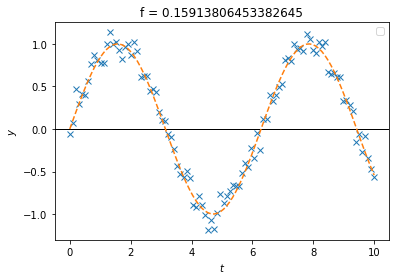

In [ ]:
t = np.linspace(0, 10, 100)
y = np.sin(t) + np.random.randn(100) / 10
plt.plot(t, y, 'x'); plt.axhline(y=0.0, linewidth=1, color='k')
N = 100
df = lambda f : np.sum( -4*np.pi*t*(y-np.sin(2*np.pi*f*t))*np.cos(2*np.pi*f*t))/N
f = gradient_search(df, (0.1+0.2)/2, gamma=1e-7, tol=1e-8)
g = lambda t: np.sin(2*np.pi*f*t)
plt.plot(t,g(t),"--")
plt.title("f = {}".format(f))
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()


## Lesson 5 - Differential equations

The following material is more elaborately covered in Chapter 7 - *Initial value problems* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).
### Introduction

A [differential equation](https://www.wikiwand.com/en/Differential_equation) is an equation that relates one or more functions and their derivatives. In applications, the functions generally represent measured quantities, the derivatives represent their rates of change, and the differential equation defines a relationship between the two. Such relations are common in biology, for instance when describing changes in the state of biological systems (molecular assemblies, cells or tissues, organisms, populations, ecological communities) that may depend on the current state that the system is in.

The general form of a *first-order differential equation* is $y' = f(x, y)$, where $y' = \frac{dy}{dx}$ and $f(x, y)$ is a given function. The solution of this equation contains an arbitrary constant (the constant of integration). To find this constant, we must know a point on the solution curve; that is, $y$ must be specified at some value of $x$, say at $x = 0$. A numerical solution of differential equations is essentially a table of values $y(x)$ listed at discrete intervals of $x$.

For example, a simplistic model that describes the growth of organisms in a nutrient-rich environment may state that the rate of increase of the population is proportional to the size of the population itself: $y' = k \cdot y$. In this case, $f(x,y) = k\cdot y$ does not depend on $x$ directly. If the initial population size equals $y(0) = y_0$, then this leads to an exact solution $y(t) = y_0 e^{kt}$ describing exponential growth.

The solution now requires the knowledge of n auxiliary conditions. If these con- ditions are specified at the same value of x, the problem is said to be an initial value problem. Then the auxiliary conditions, called initial conditions, have the form
$$
y_0(a) = a_0
$$
$$
y_1(a) = a_1
$$
$$
y_2(a) = a_2
$$
If yi are specified at different values of x, the problem is called a boundary value
problem.
$$
y'' = -y
$$
$$
y(0) = 1
$$
$$
y'(0) = 0
$$
the two conditions are specified at different values of x is a boundary value problem.
$$
y' = -y
$$
$$
y(0) = 1
$$
$$
y(π) = 0
$$
### Euler's Method

[Euler's method](https://en.wikipedia.org/wiki/Euler_method) of solution is conceptually simple. The function $f$ can be linearly approximated as $y(x + h) \approx y(x) + y'(x) \cdot h$. By predicting $\boldsymbol{y}$ at $x + h$ from the information available at $x$, it can be used to move the solution forward in steps of $h$.

$$
\boldsymbol{y}(x + h) \approx \boldsymbol{y}(x) + \boldsymbol{f}(x, \boldsymbol {y}(x)) \cdot h
$$

Euler's method is seldom used in practice because of its computational inefficiency. Suppressing the truncation error to an acceptable level requires a very small $h$, resulting in many integration steps accompanied by an increase in the roundoff error. The value of the method lies mainly in its simplicity.

In [ ]:
import numpy as np
def euler(f, y0, x0, x1, steps):
    """xs, ys = euler(f, y0, x0, x1, steps).
    Euler's method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    # 2 x need 3 to check
    y = y0
    ys = [y]
    for x in xs[:-1]:
        y = y + h * f(x,y)
        ys.append(y)
    return xs, ys

In [ ]:
# check accuracy
ns = [1, 10, 100, 1000, 10000, 100000]
for n in ns:
    xs, ys = euler(func, y0, x0, x1, n)
    print(f'n = {n:6}: |Δy| = {np.linalg.norm(ys[0]-ys[-1]):8.1e}')

｜### Heun's method

As demonstrated in the figure above, the accuracy of Euler's method is limited. The reason is that the derivative $\boldsymbol{y}'$ is only calculated at the beginning of the step, whereas it is assumed to apply throughout the entire step. Therefore, it cannot account for any changes in $\boldsymbol{y}'$ that may occur over the interval that is integrated over.

A better method can be obtained by first performing a step according to Euler's method based on $\boldsymbol{f}(x,\boldsymbol{y}(x))$, by subsequently calculating the derivative $\boldsymbol{f}(x+h,\boldsymbol{y}(x+h))$ at the estimated end value, and then going back and re-calculating the step size based on the average of these two derivatives. Thus, the above Euler's formula is succeeded by an additional calculation according to

$$
\boldsymbol{y}(x + h) \approx \boldsymbol{y}(x) + \frac{\boldsymbol{f}(x ,\boldsymbol{y}(x)) + \boldsymbol{f}(x+h, \boldsymbol {y}(x+h))}{2} \cdot h
$$

The resulting algorithm is called [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method), or is also known as the *modified* or *improved Euler's method*. This is an example of a *predictor-corrector* method, since one calculation is used to predict an initial estimation of the step to be taken, and a second calculation provides a more precise correction to that estimate.

In [ ]:
def heun(f, y0, x0, x1, steps):
    """xs, ys = heun(f, y0, x0, x1, steps).
    Heun's method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    # 2 x need 3 to check
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k1 = h * f(x,y)
        k2 = h * f(x + h , y + k1)
        y = y + (k1 + k2)/2
        ys.append(y)
    return xs, ys

### 4th-order Runge-Kutta Method

The idea of using intermediate evaluations of the derivative $\boldsymbol{y}'$ for the integration can be further extended. For example, the [fourth-order Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) evaluates four different derivatives according to the following procedure

$$
\begin{aligned}
\boldsymbol{k}_0 &= h \cdot \boldsymbol{f}(x, \boldsymbol{y}(x))
\\
\boldsymbol{k}_1 &= h \cdot \boldsymbol{f}(x + \frac{1}{2} h, \boldsymbol{y}(x + \frac{1}{2} \boldsymbol{k}_0))
\\
\boldsymbol{k}_2 &= h \cdot \boldsymbol{f}(x + \frac{1}{2} h, \boldsymbol{y}(x + \frac{1}{2} \boldsymbol{k}_1))
\\
\boldsymbol{k}_3 &= h \cdot \boldsymbol{f}(x + h, \boldsymbol{y}(x + \boldsymbol{k}_2))
\end{aligned}
$$

In words:

- $\boldsymbol{k}_0$ evaluates the derivative at the starting point.

- $\boldsymbol{k}_1$ evaluates the derivative after half a step, based on $\boldsymbol{k}_0$.

- $\boldsymbol{k}_2$ again evaluates the derivative after half a step, but now based on the more accurate $\boldsymbol{k}_1$.

- $\boldsymbol{k}_3$ evaluates the derivative at the end of the step, based on $\boldsymbol{k}_2$.

Finally, the value of $\boldsymbol{y}$ is updated according to

$$
\boldsymbol{y}(x + h) \approx \boldsymbol{y}(x) + \frac{\boldsymbol{k}_0 + 2 \boldsymbol{k}_1 + 2 \boldsymbol{k}_2 + \boldsymbol{k}_3}{6}
$$

The various coefficients in this formula have been chosen carefully so that errors cancel each other optimally. The proof of this fact is beyond our scope.

In [ ]:
def runge_kutta(f, y0, x0, x1, steps):
    """xs, ys = runge_kutta(f, y0, x0, x1, steps).
    4th-order Runge-Kutta method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k0 = h * f(x,y)
        k1 = h * f(x + (0.5 * h) , y + (0.5 * k0))
        k2 = h * f(x + (0.5 * h) , y + (0.5 * k1))
        k3 = h * f(x + h , y + k2)
        y = y + (k0 + (2*k1) + (2*k2) +k3) / 6
        ys.append(y)
    return xs, ys

In [ ]:
def kutta(f, y0, x0, x1, steps):
    """xs, ys = kutta(f, y0, x0, x1, steps).
    3rd-order Kutta method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k0 = h * f(x,y)
        k1 = h * f(x + (0.5 * h) , y + (0.5 * k0))
        k2 = h * f(x + h , y + (-1) * k0 + 2 * k1)
        y = y + (k0 + (4*k1) + k2) / 6
        ys.append(y)
    return xs, ys

### The Runge-Kutta Method Family

All of the above algorithms form special cases in a more general [Runge-Kutta family of methods](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods) that calculate any number of intermediate derivatives according to the following equations

$$
\begin{aligned}
\boldsymbol{k}_0 &= h \cdot \boldsymbol{f}(x, \boldsymbol{y}(x))
\\
\boldsymbol{k}_1 &= h \cdot \boldsymbol{f}(x + q_{1,0} \cdot h, \boldsymbol{y}(x) + q_{1,0} \cdot \boldsymbol{k}_0)
\\
\boldsymbol{k}_2 &= h \cdot \boldsymbol{f}(x + (q_{2,0} + q_{2,1}) \cdot h, \boldsymbol{y}(x) + q_{2,0} \cdot \boldsymbol{k}_0 + q_{2,1} \cdot \boldsymbol{k}_1)
\\
\vdots
\\
\boldsymbol{k}_n &= h \cdot \boldsymbol{f}(x + \sum_{m=0}^{n-1} q_{nm} \cdot h, \boldsymbol{y}(x) + \sum_{m=0}^{n-1} q_{nm} \cdot \boldsymbol{k}_m)
\end{aligned}
$$

followed by a final single step

$$
\boldsymbol{y}(x + h) = \boldsymbol{y}(x) + \sum_{m=0}^{n} c_m \cdot \boldsymbol{k}_m
$$

The coefficients of many such methods can be found in reference books or online; some of the more important examples are listed below in the form of Butcher tables. Verify that the listed coefficients for the Euler's, Heun's and Runge-Kutta methods all describe the formulas that were given earlier.

| Method | Order | $\boldsymbol{c}$ | $\boldsymbol{q}$ |
| - | - | - | - |
| Euler's | 1 | $1$ | $\times$ |
| Heun's | 2 | $\frac{1}{2}$, $\frac{1}{2}$ | $1$ |
| Midpoint | 2 | $0$, $1$ | $\frac{1}{2}$ |
| SSPRK3 | 3 | $\frac{1}{6}$, $\frac{1}{6}$, $\frac{2}{3}$ | $\begin{array}{cc} 1 & \\ \frac{1}{4} & \frac{1}{4} \end{array}$ |
| Kutta's | 3 | $\frac{1}{6}$, $\frac{2}{3}$, $\frac{1}{6}$ | $\begin{array}{cc} \frac{1}{2} & \\ -1 & 2 \end{array}$ |
| Runge-Kutta's | 4 | $\frac{1}{6}$, $\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{6}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ 0 & \frac{1}{2} & \\ 0 & 0 & 1 \end{array}$ |
| 3/8-rule | 4 | $\frac{1}{8}$, $\frac{3}{8}$, $\frac{3}{8}$, $\frac{1}{8}$ | $\begin{array}{ccc} \frac{1}{3} & & \\ -\frac{1}{3} & 1 & \\ 1 & -1 & 1 \end{array}$ |
| SSPRK4 | 4 | $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{2}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ \frac{1}{2} & \frac{1}{2} & \\ \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \end{array}$ |
| Butcher's | 5 | $\frac{7}{90}$, $0$, $\frac{32}{90}$, $\frac{12}{90}$, $\frac{32}{90}$, $\frac{7}{90}$ | $\begin{array}{ccccc} \frac{1}{4} & & & & \\ \frac{1}{8} & \frac{1}{8} & & & \\ 0 & -\frac{1}{2} & 1 & & \\ \frac{3}{16} & 0 & 0 & \frac{9}{16} & \\ -\frac{3}{7} & \frac{2}{7} & \frac{12}{7} & -\frac{12}{7} & \frac{8}{7} \end{array}$ |

Third-order methods are not popular in computer application. Most programmers prefer integration formulas of order four, which achieve a given accuracy with less computational effort. The Runge-Kutta method is popular in particular because it combines an adequate accuracy (being of order 4) with a relative simplicity (because several $q_{nm}$ equal zero).

In [ ]:
# Euler's method uses the derivative at the current point (x0,y0) to create a tangent line that creates a linear prediction of the solution at x1. 
# The midpoint takes an initial half step in sample, and samples the derivative there. 
# The function is evaluated halfway and it disregards the first order result for the final solution.
def midpoint(f, y0, x0, x1, steps):
    """xs, ys = midpoint(f, y0, x0, x1, steps).
    2rd-order midpoint method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k0 = h * f(x,y)
        k1 = h * f(x + 0.5*h , y + 0.5*k0)
        y = y + k1
        ys.append(y)
    return xs, ys

def my_method(f, y0, x0, x1, steps):
    """xs, ys = my_method(f, y0, x0, x1, steps).
    My own method for solving the 3/8rule 
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k0 = h * f(x,y)
        k1 = h * f(x + h/3   , y + k0/3)
        k2 = h * f(x + 2*h/3 , y - k0/3 + k1)
        k3 = h * f(x + h     , y + k0 - k1 + k2 )
        y = y + (k0 + 3*k1 + 3 * k2 + k3) / 8
        ys.append(y)
    return xs, ys

In [ ]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
func = lambda x, y: 3 * y - 4 * np.exp(-x)
func_solution = lambda x : np.exp(-x)

y0=1
x0=0
x1=4
h =0.01
steps = int((x1 - x0) / h)
xs = np.linspace(x0, x1, steps + 1)
plt.plot(xs,func_solution(xs),label = "Exact")


xs,ys = euler(func, y0, x0, x1, steps)
plt.plot(xs,ys,label = "euler")
xs,ys = heun(func, y0, x0, x1, steps)
plt.plot(xs,ys,label ="heun")
xs,ys = runge_kutta(func, y0, x0, x1, steps)
plt.plot(xs,ys,label ="runge_kutta")
xs,ys = kutta(func, y0, x0, x1, steps)
plt.plot(xs,ys,label ="kutta")
xs,ys = midpoint(func, y0, x0, x1, steps)
plt.plot(xs,ys,label = "midpoint")
xs,ys = my_method(func, y0, x0, x1, steps)
plt.plot(xs,ys,label ="3/8 rule")

plt.ylim([-1.5, 1.5])
plt.xlim([0, 4.0])
plt.axhline(0.0, color='black', lw=0.5)
plt.legend()
plt.show()

### Exercise

The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations

$$
\begin{aligned}
\frac{dx}{dt} &= \alpha \cdot x - \beta \cdot x y
\\
\frac{dy}{dt} &= \delta \cdot x y - \gamma \cdot y
\end{aligned}
$$

Plot the population dynamics for $\alpha = \frac{2}{3}$, $\beta = \frac{4}{3}$, $\delta = \gamma = 1$, and initial conditions $x = y = \frac{3}{2}$.

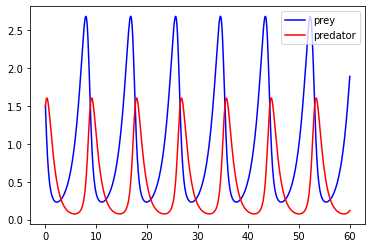

In [ ]:
def lotka_volterra(t,state):
    alpha = 2/3
    beta = 4/3
    gamma = 1
    theta = 1
    x,y = state
    return np.array([alpha*x-beta*x*y, theta * x * y - gamma *y])
xs,ys = runge_kutta(lotka_volterra,[3/2,3/2],0,60,600)
plt.plot(xs,[y[0] for y in ys], '-b', label='prey')
plt.plot(xs,[y[1] for y in ys], '-r', label='predator')
plt.legend()

The [Bessel function $J_0$](https://en.wikipedia.org/wiki/Bessel_function) is given by the 2<sup>nd</sup>-order differential equation

$$
J_0'' + \frac{1}{x} \cdot J_0' + J_0 = 0
$$

with initial values $J_0(0) = 1$ and $J_0'(0) = 0$. How many zeroes does this function have in the range $x = 0$ to $25$?

(Hint: To avoid the singularity at $x = 0$, start the integration at $x = 10^{-12}$.)




An ordinary differential equation of arbitrary order $n$ can be written as $y^{(n)} = f(x, y, y', \ldots, y^{(n−1)})$. This can always be transformed into $n$ first-order equations. Using the notation $y_0 = y, y_1 = y', y_2 = y'', \ldots, y_{n−1} = y^{(n−1)}$, the equivalent first-order equations are $y_0' = y_1, y_1' = y_2, y_2' = y_3, \ldots, y_n' = f(x, y_0, y_1, \ldots, y_{n−1})$.
$$
y_0'' + \frac{1}{x} \cdot y_0' + y_0 = 0
$$
$$
y_2 + \frac{1}{x} \cdot y_1 + y_0 = 0
$$
$$
y_1 = y'
$$
$$
y_2 =  -(\frac{1}{x} \cdot y_1 + y_0)
$$


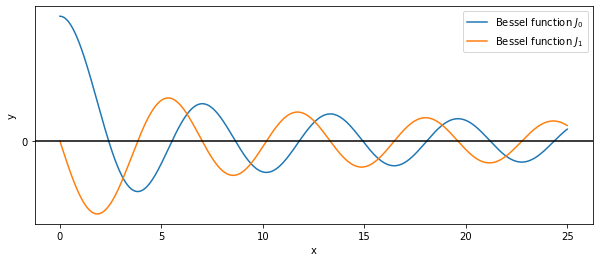

In [ ]:
def Bessel(t, v):
    y0,y1 = v[0],v[1]
    return np.array([  y1,  -(1/t*y1+y0) ])


y0 = [ 1, 0]
x0 = 1e-12
x1 = 25
xs,ys = runge_kutta(Bessel, y0, x0, x1, int(1e5))
plt.figure(figsize=(10, 4))
plt.plot(xs, [y[0] for y in ys],label = 'Bessel function $J_0$')
plt.plot(xs, [y[1] for y in ys],label = 'Bessel function $J_1$')
plt.axhline("0",color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()